# Datos de PVPC

Generación (o actualización) del archivo local de datos de PVPC recogidos en https://www.esios.ree.es/

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from esiosdata import PVPC
from esiosdata.prettyprinting import *

pvpc_handler = PVPC()

* BASE DE DATOS LOCAL HDF:
	Nº entradas:	24913 mediciones
	Última:     	01-02-2017 23:00
LA INFORMACIÓN ESTÁ ACTUALIZADA (delta = -33924.5 segs)


#### Información sobre el archivo local de datos de PVPC:

In [40]:
print_ok('Códigos de tarifas: {}'.format(pvpc_handler.tarifas))

ts_last, nrows_tot = pvpc_handler.last_entry()
print_cyan('TS LAST VALUE: {}; TOTAL VALUES: {}'.format(ts_last, nrows_tot))

df_pvpc = pvpc_handler.data['data']
print_ok('Columnas de datos de PVPC: {}'.format(df_pvpc.columns))

print_red('Últimos valores:\n{}'.format(df_pvpc[pvpc_handler.tarifas].tail(24)))

Códigos de tarifas: ['GEN', 'NOC', 'VHC']
TS LAST VALUE: 2017-02-01 23:00:00+01:00; TOTAL VALUES: 24913
Columnas de datos de PVPC: Index(['CCVGEN', 'CCVNOC', 'CCVVHC', 'COFGEN', 'COFNOC', 'COFVHC', 'FOMGEN', 'FOMNOC', 'FOMVHC', 'FOSGEN', 'FOSNOC', 'FOSVHC', 'GEN', 'INTGEN', 'INTNOC', 'INTVHC', 'NOC', 'PCAPGEN', 'PCAPNOC', 'PCAPVHC', 'PMHGEN', 'PMHNOC', 'PMHVHC',
       'SAHGEN', 'SAHNOC', 'SAHVHC', 'TEUGEN', 'TEUNOC', 'TEUVHC', 'VHC', 'TCUGEN', 'CPGEN'],
      dtype='object')
Últimos valores:
                               GEN      NOC      VHC
fecha                                               
2017-02-01 00:00:00+01:00  0.14644  0.09541  0.10140
2017-02-01 01:00:00+01:00  0.13607  0.08543  0.08132
2017-02-01 02:00:00+01:00  0.13441  0.08378  0.07979
2017-02-01 03:00:00+01:00  0.12816  0.07782  0.07401
2017-02-01 04:00:00+01:00  0.12777  0.07744  0.07364
2017-02-01 05:00:00+01:00  0.12913  0.07882  0.07497
2017-02-01 06:00:00+01:00  0.13737  0.08690  0.08293
2017-02-01 07:00:00+01:00

### Resúmenes diarios y mensuales:

In [41]:
pvpc_mean_daily, pvpc_mean_monthly = pvpc_handler.get_resample_data()
print_yellow(pvpc_mean_daily[pvpc_handler.tarifas].tail(10))
print_magenta(pvpc_mean_monthly[pvpc_handler.tarifas].tail(10))

                                  GEN         NOC         VHC
fecha                                                        
2017-01-23 00:00:00+01:00  157.642917  135.967083  136.845000
2017-01-24 00:00:00+01:00  161.831667  140.119583  141.029167
2017-01-25 00:00:00+01:00  168.692917  146.577500  147.699167
2017-01-26 00:00:00+01:00  162.972917  141.004167  141.808750
2017-01-27 00:00:00+01:00  148.272500  126.769167  127.587500
2017-01-28 00:00:00+01:00  133.752083  112.358333  113.311667
2017-01-29 00:00:00+01:00  135.939167  114.569583  115.535000
2017-01-30 00:00:00+01:00  142.190833  120.892500  121.703750
2017-01-31 00:00:00+01:00  145.432083  124.146250  124.929583
2017-02-01 00:00:00+01:00  140.008333  118.652083  119.332917
                                  GEN         NOC         VHC
fecha                                                        
2016-05-01 00:00:00+02:00   86.920578   66.976962   67.162903
2016-06-01 00:00:00+02:00  100.247875   80.059403   80.291764
2016-07-

## Obtención directa de datos por día

Sin recurrir al archivo local, se pueden obtener los datos de PVPC en un día o un rango de días concretos descargándolos directamente de la web:

In [42]:
from esiosdata.importpvpcdata import pvpc_data_dia

data_dia = pvpc_data_dia(str_dia='2017-01-25')
print_red(data_dia[pvpc_handler.tarifas])

                              GEN     NOC     VHC
fecha                                            
2017-01-25 00:00:00+01:00  180.68  127.90  135.79
2017-01-25 01:00:00+01:00  165.76  113.58  108.60
2017-01-25 02:00:00+01:00  158.33  106.59  101.73
2017-01-25 03:00:00+01:00  155.63  103.93   99.25
2017-01-25 04:00:00+01:00  152.73  101.24   96.65
2017-01-25 05:00:00+01:00  153.49  102.06   97.51
2017-01-25 06:00:00+01:00  156.43  105.03  100.54
2017-01-25 07:00:00+01:00  172.45  120.53  127.60
2017-01-25 08:00:00+01:00  173.83  122.56  129.00
2017-01-25 09:00:00+01:00  172.59  121.68  127.72
2017-01-25 10:00:00+01:00  171.83  121.15  126.98
2017-01-25 11:00:00+01:00  170.15  119.63  125.30
2017-01-25 12:00:00+01:00  169.21  188.43  124.36
2017-01-25 13:00:00+01:00  169.73  188.95  188.95
2017-01-25 14:00:00+01:00  163.29  182.45  182.45
2017-01-25 15:00:00+01:00  161.63  180.87  180.87
2017-01-25 16:00:00+01:00  159.85  178.97  178.97
2017-01-25 17:00:00+01:00  166.28  185.47  185.47


### Plotting

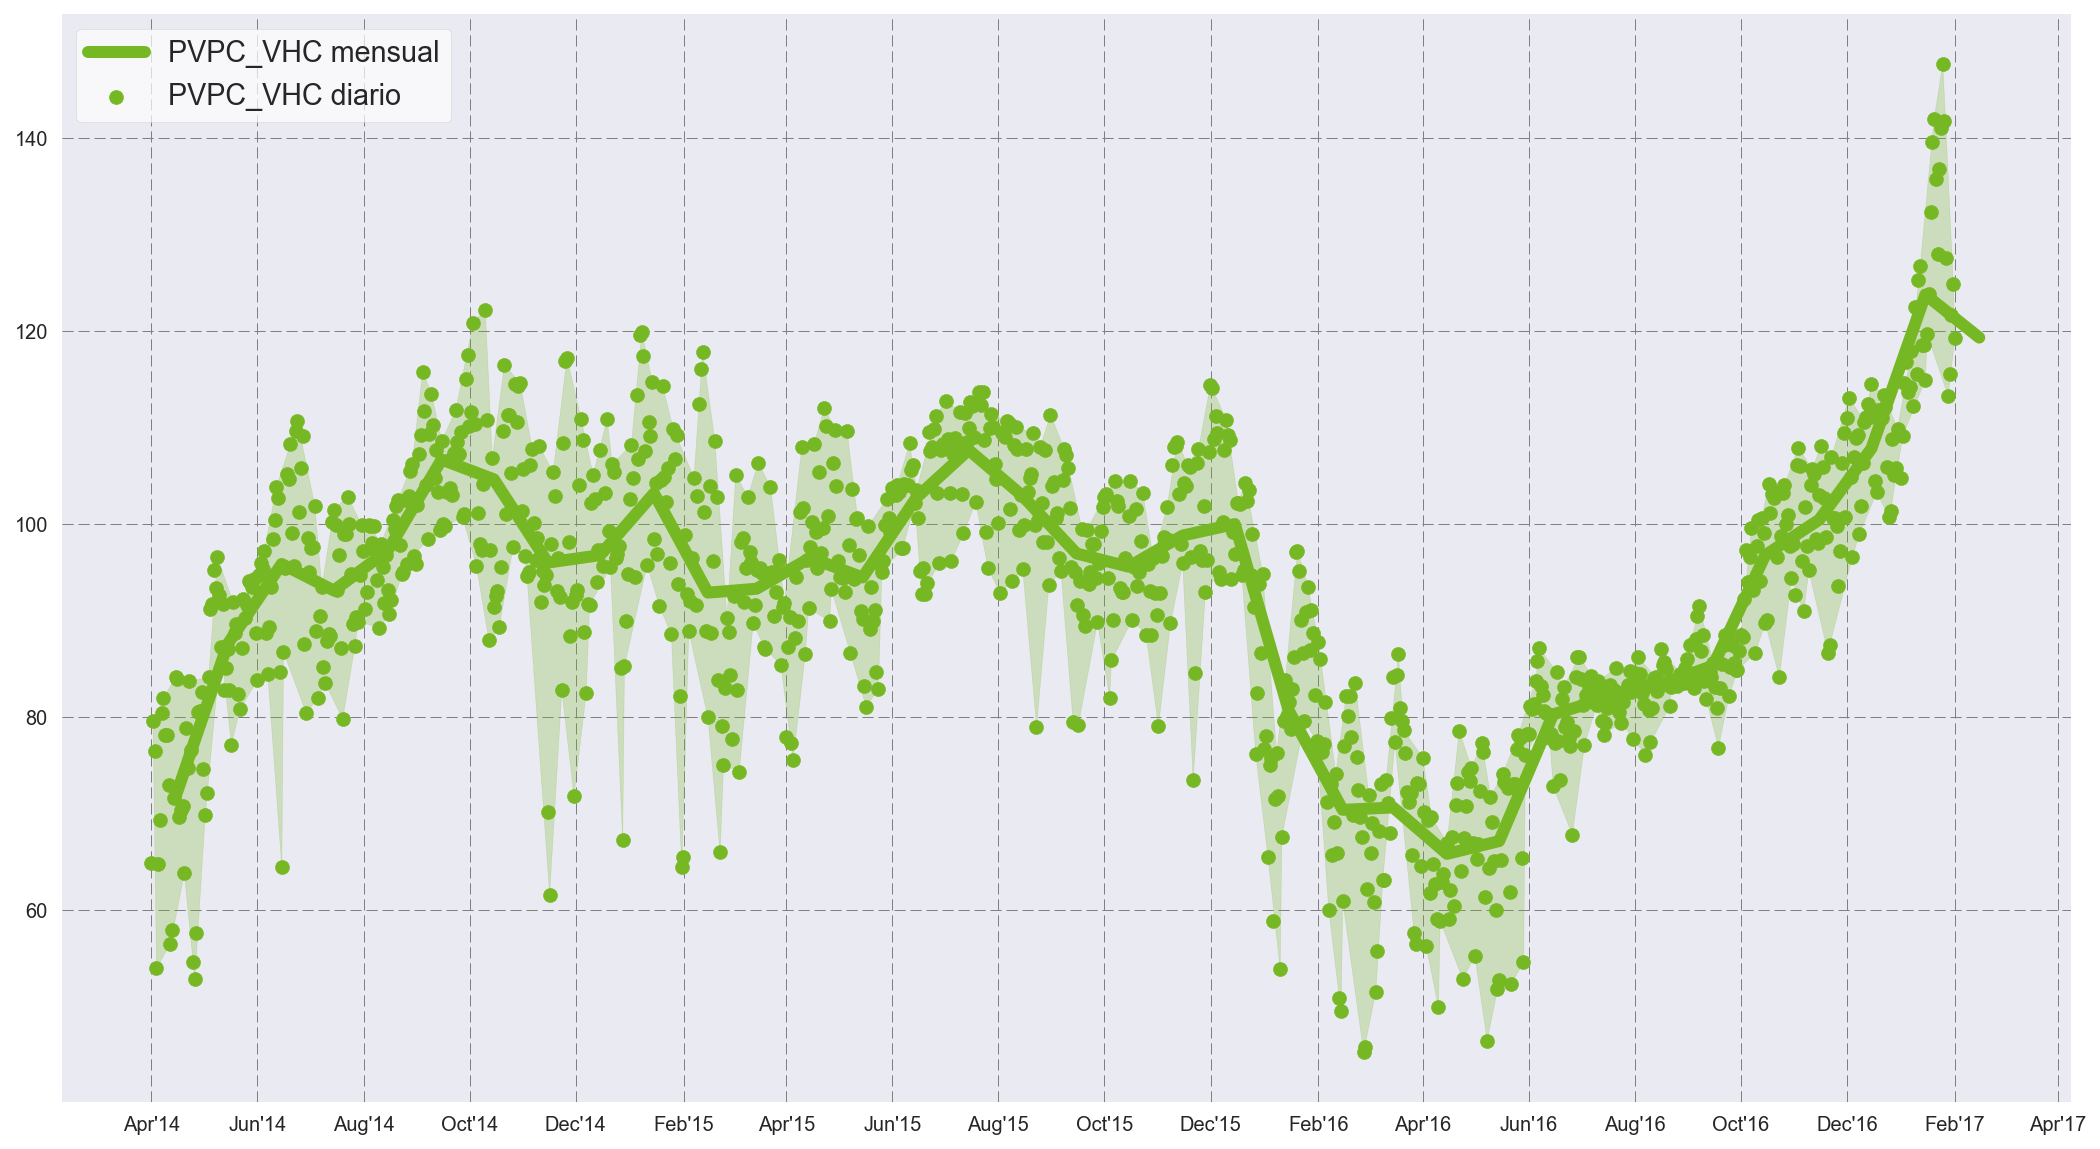

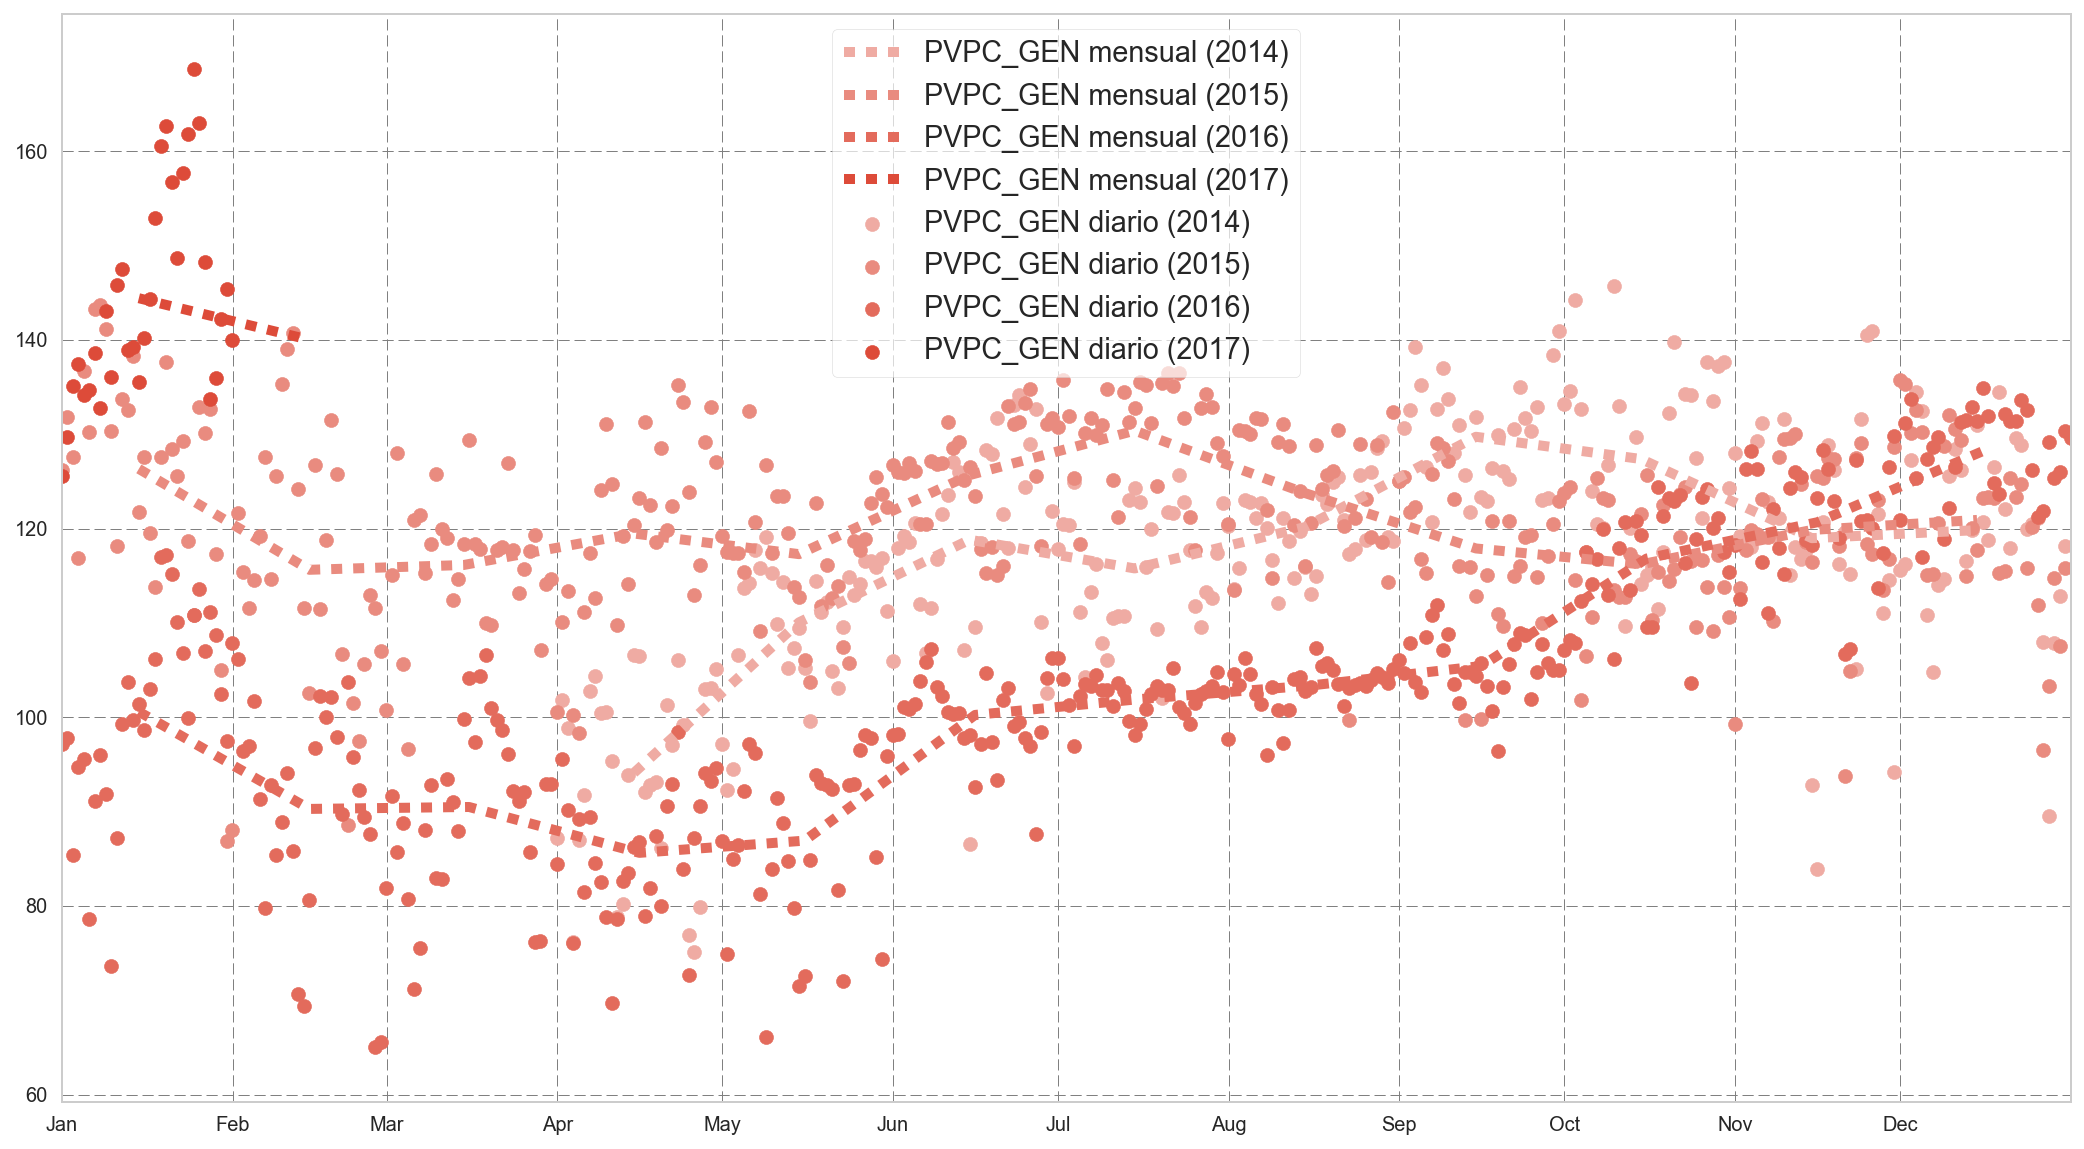

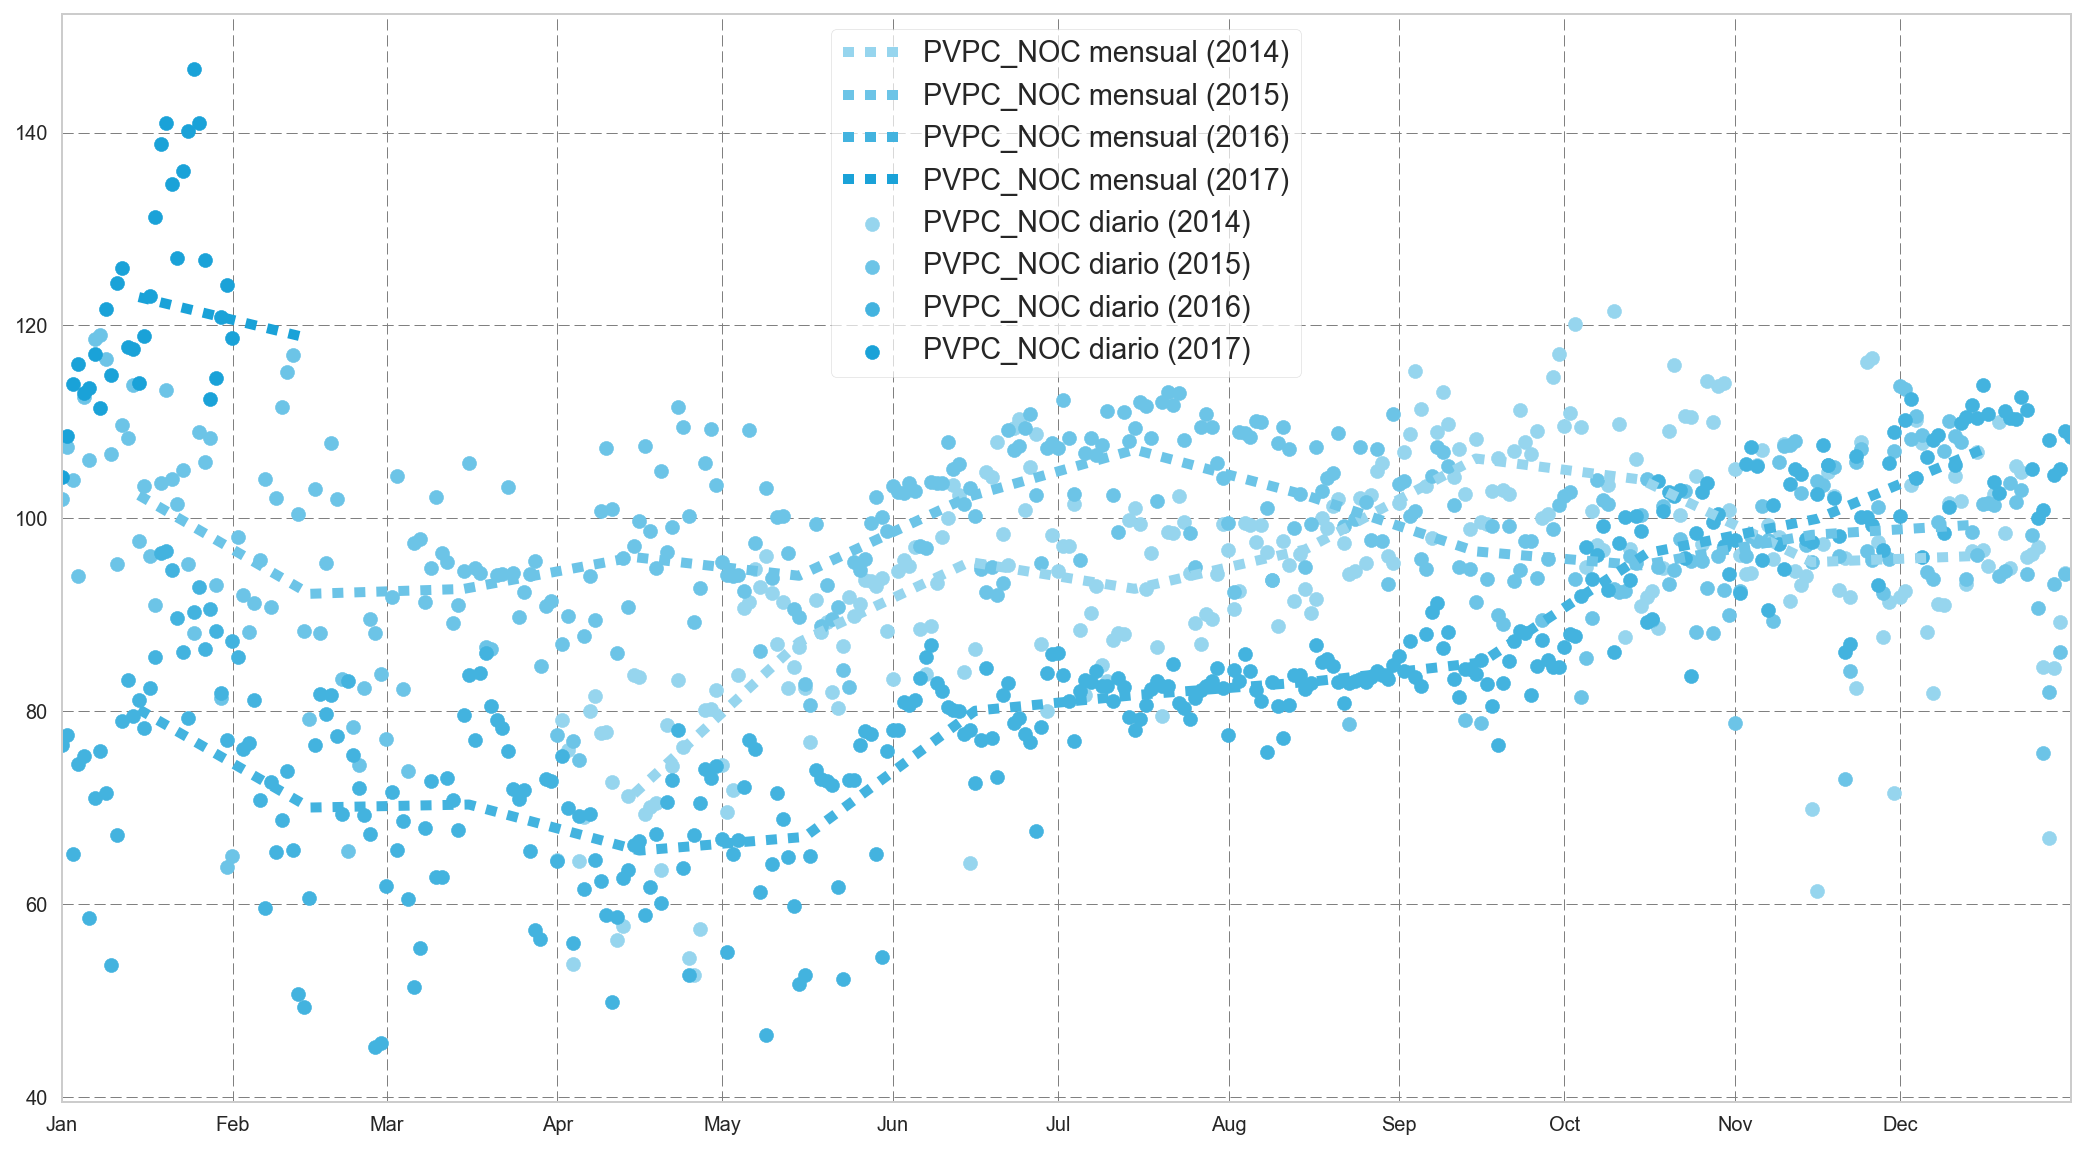

In [45]:
from esiosdata.pvpcplot import (pvpcplot_ev_scatter, pvpcplot_grid_hora, pvpcplot_tarifas_hora,
                                pvpcplot_fill_tarifa)

FIGSIZE = (16, 9)

# PLOTS EV. DIARIA Y MENSUAL:
pvpcplot_ev_scatter(pvpc_mean_daily, pvpc_mean_monthly, tarifa='GEN')
pvpcplot_ev_scatter(pvpc_mean_daily, pvpc_mean_monthly, tarifa='NOC')
pvpcplot_ev_scatter(pvpc_mean_daily, pvpc_mean_monthly, tarifa='VHC', superposic_anual=False)

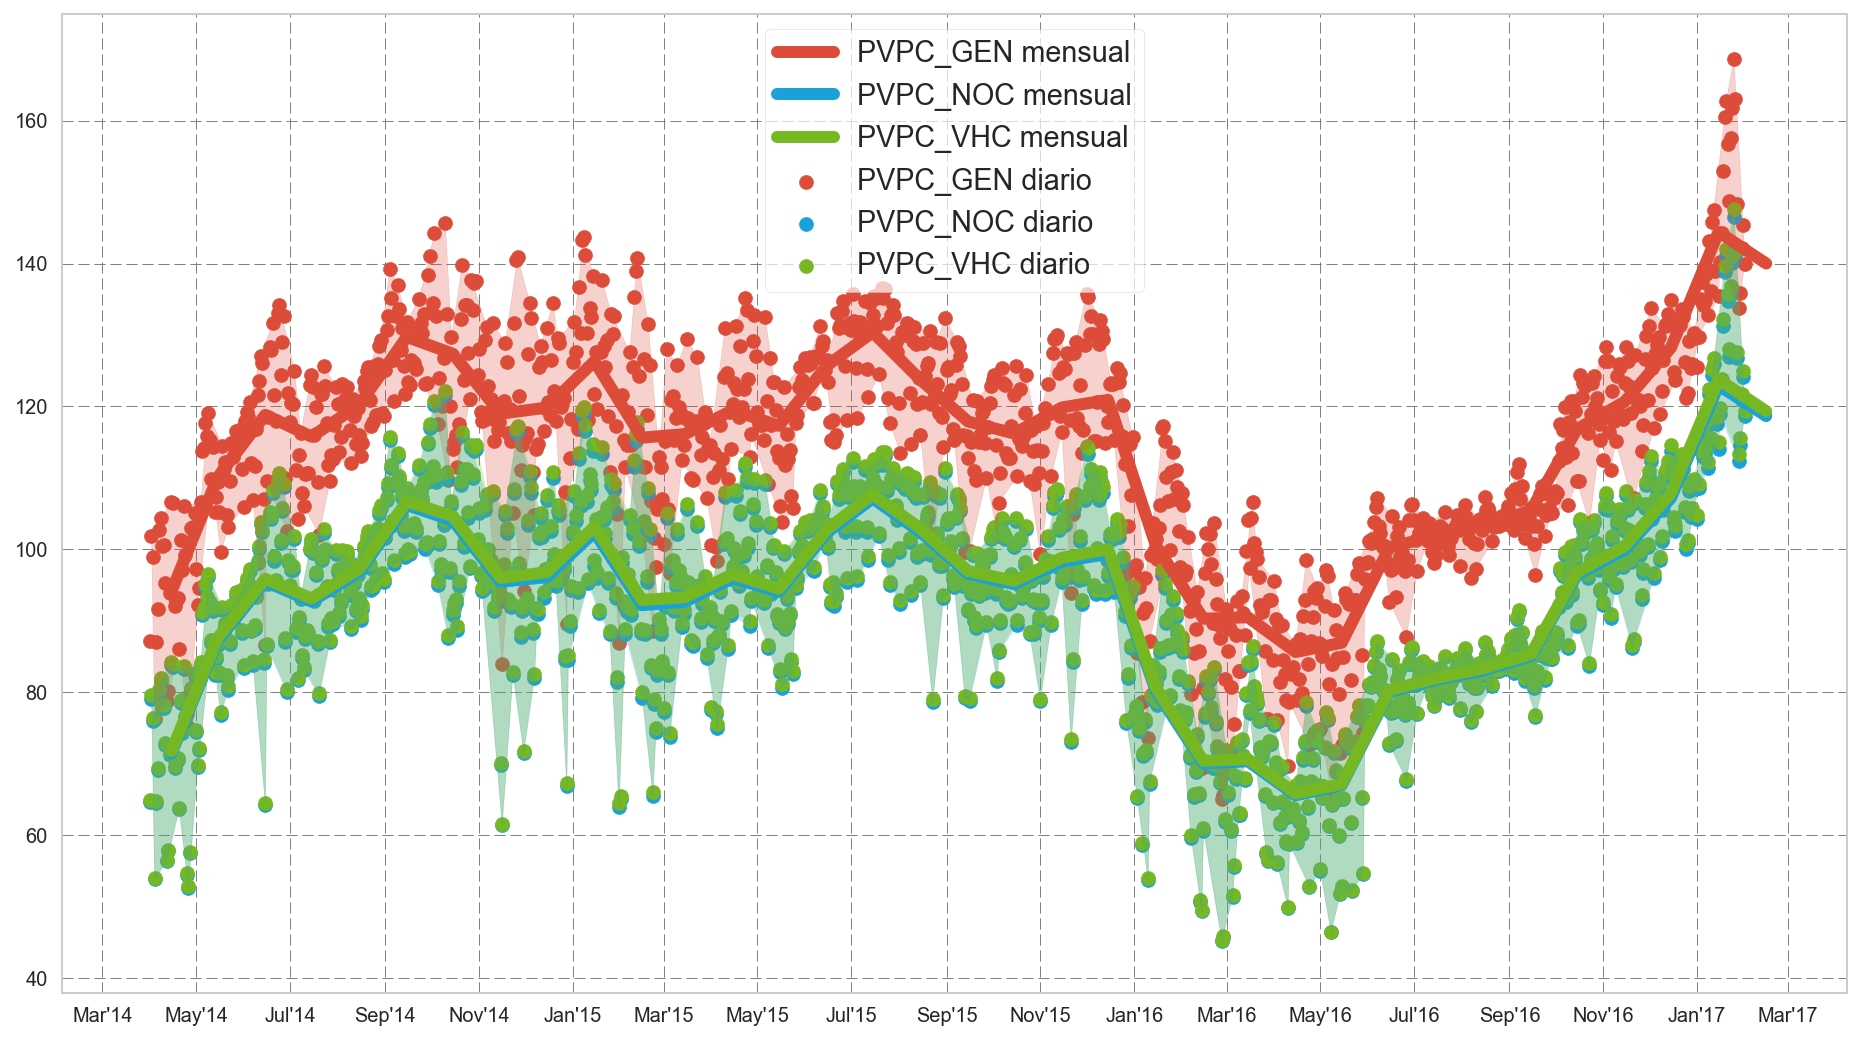

In [46]:
fig, ax = plt.subplots(figsize=FIGSIZE)
for k in pvpc_handler.tarifas:
    pvpcplot_ev_scatter(pvpc_mean_daily, pvpc_mean_monthly, tarifa=k, superposic_anual=False, ax=ax, plot=False)
plt.show()

### Plots diarios (o de intervalo horario):

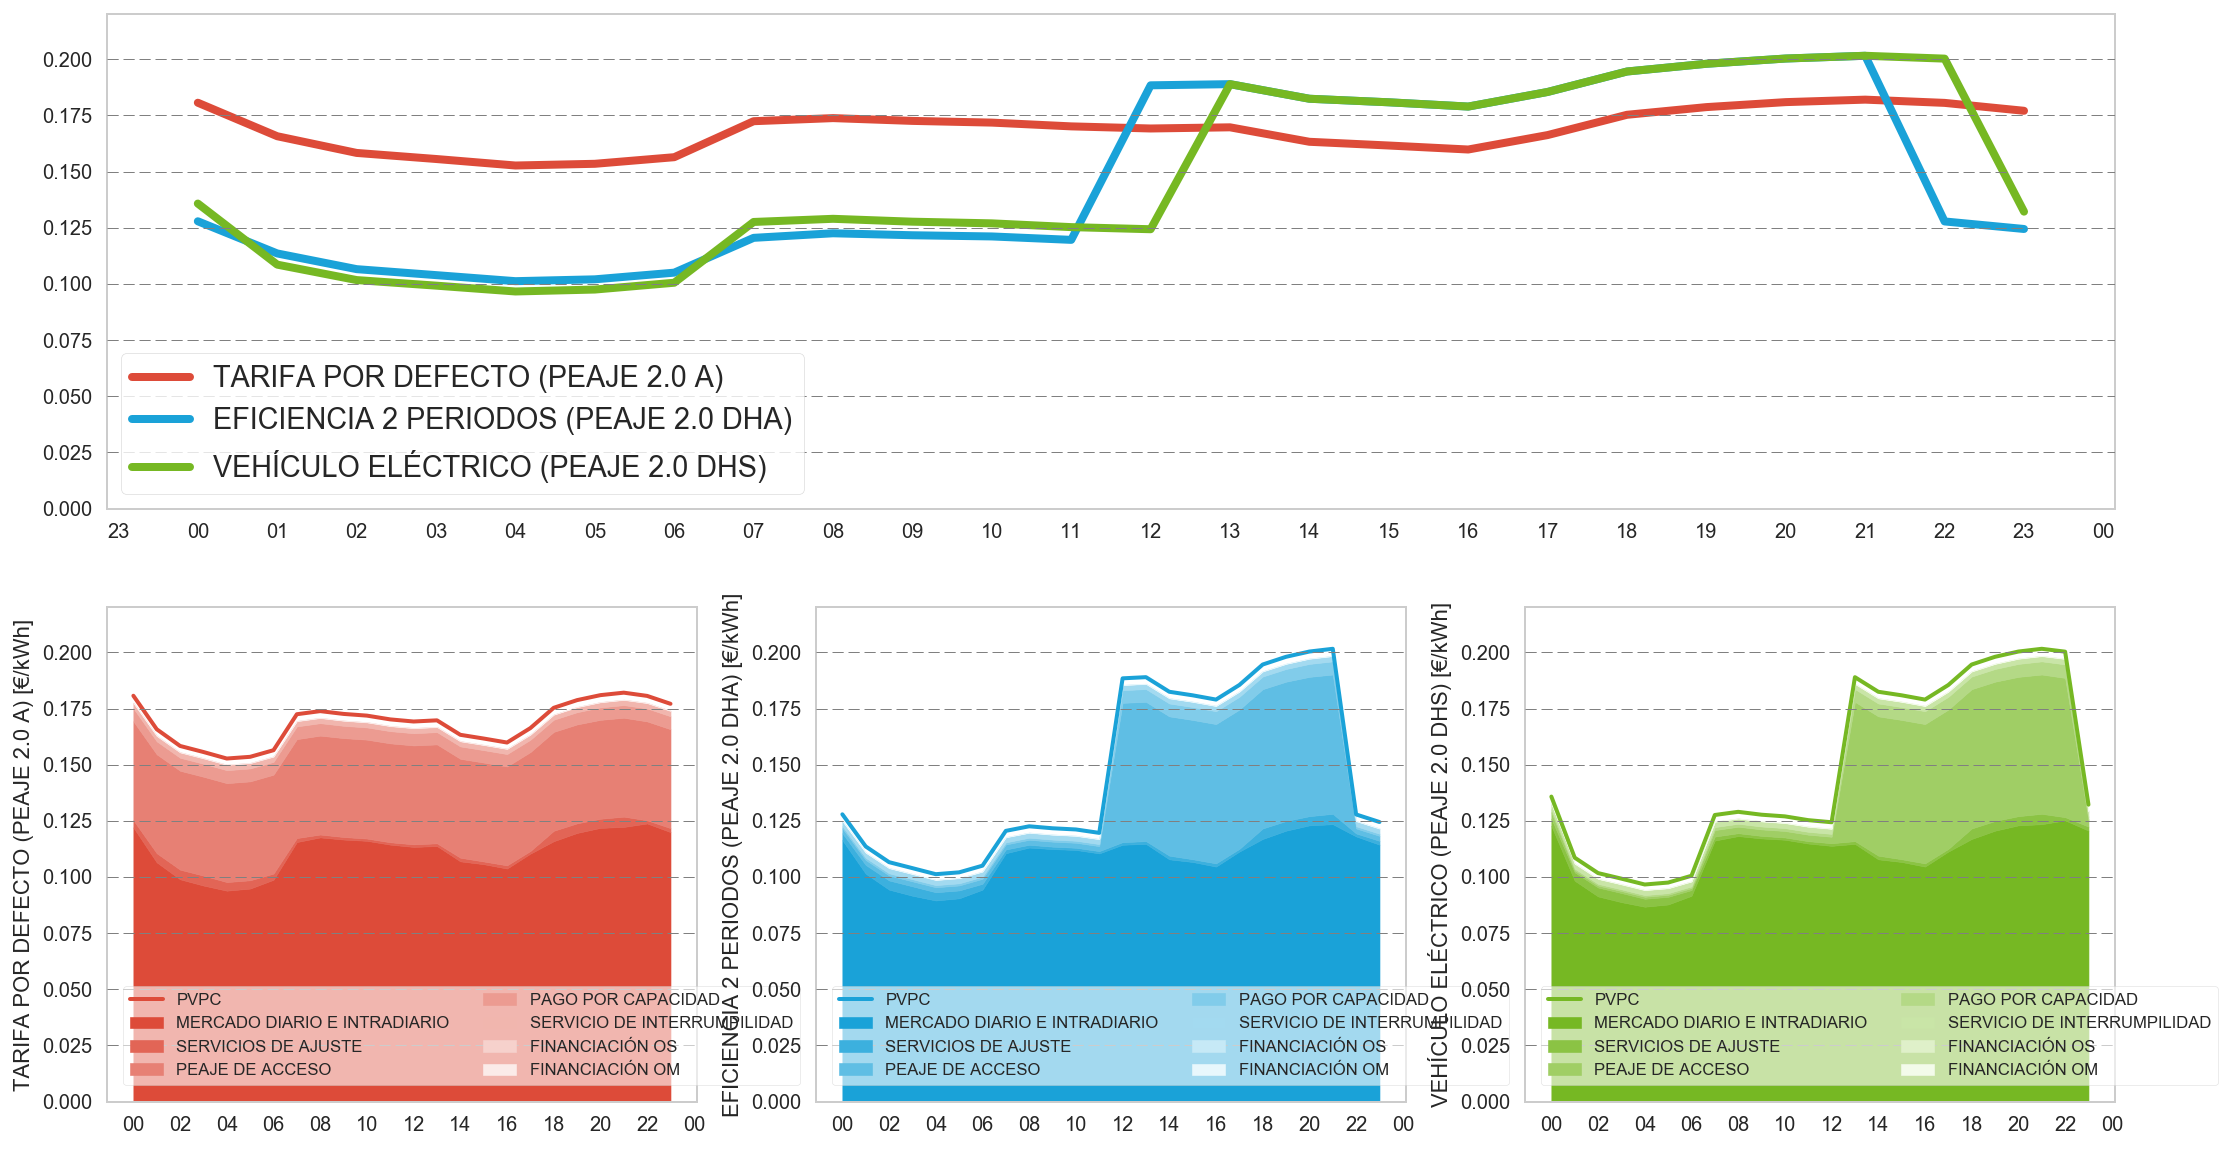

In [49]:
# PLOTS DIARIOS (O DE INTERVALO HORARIO):
df_day = df_pvpc.loc['2017-01-25']
pvpcplot_grid_hora(df_day)

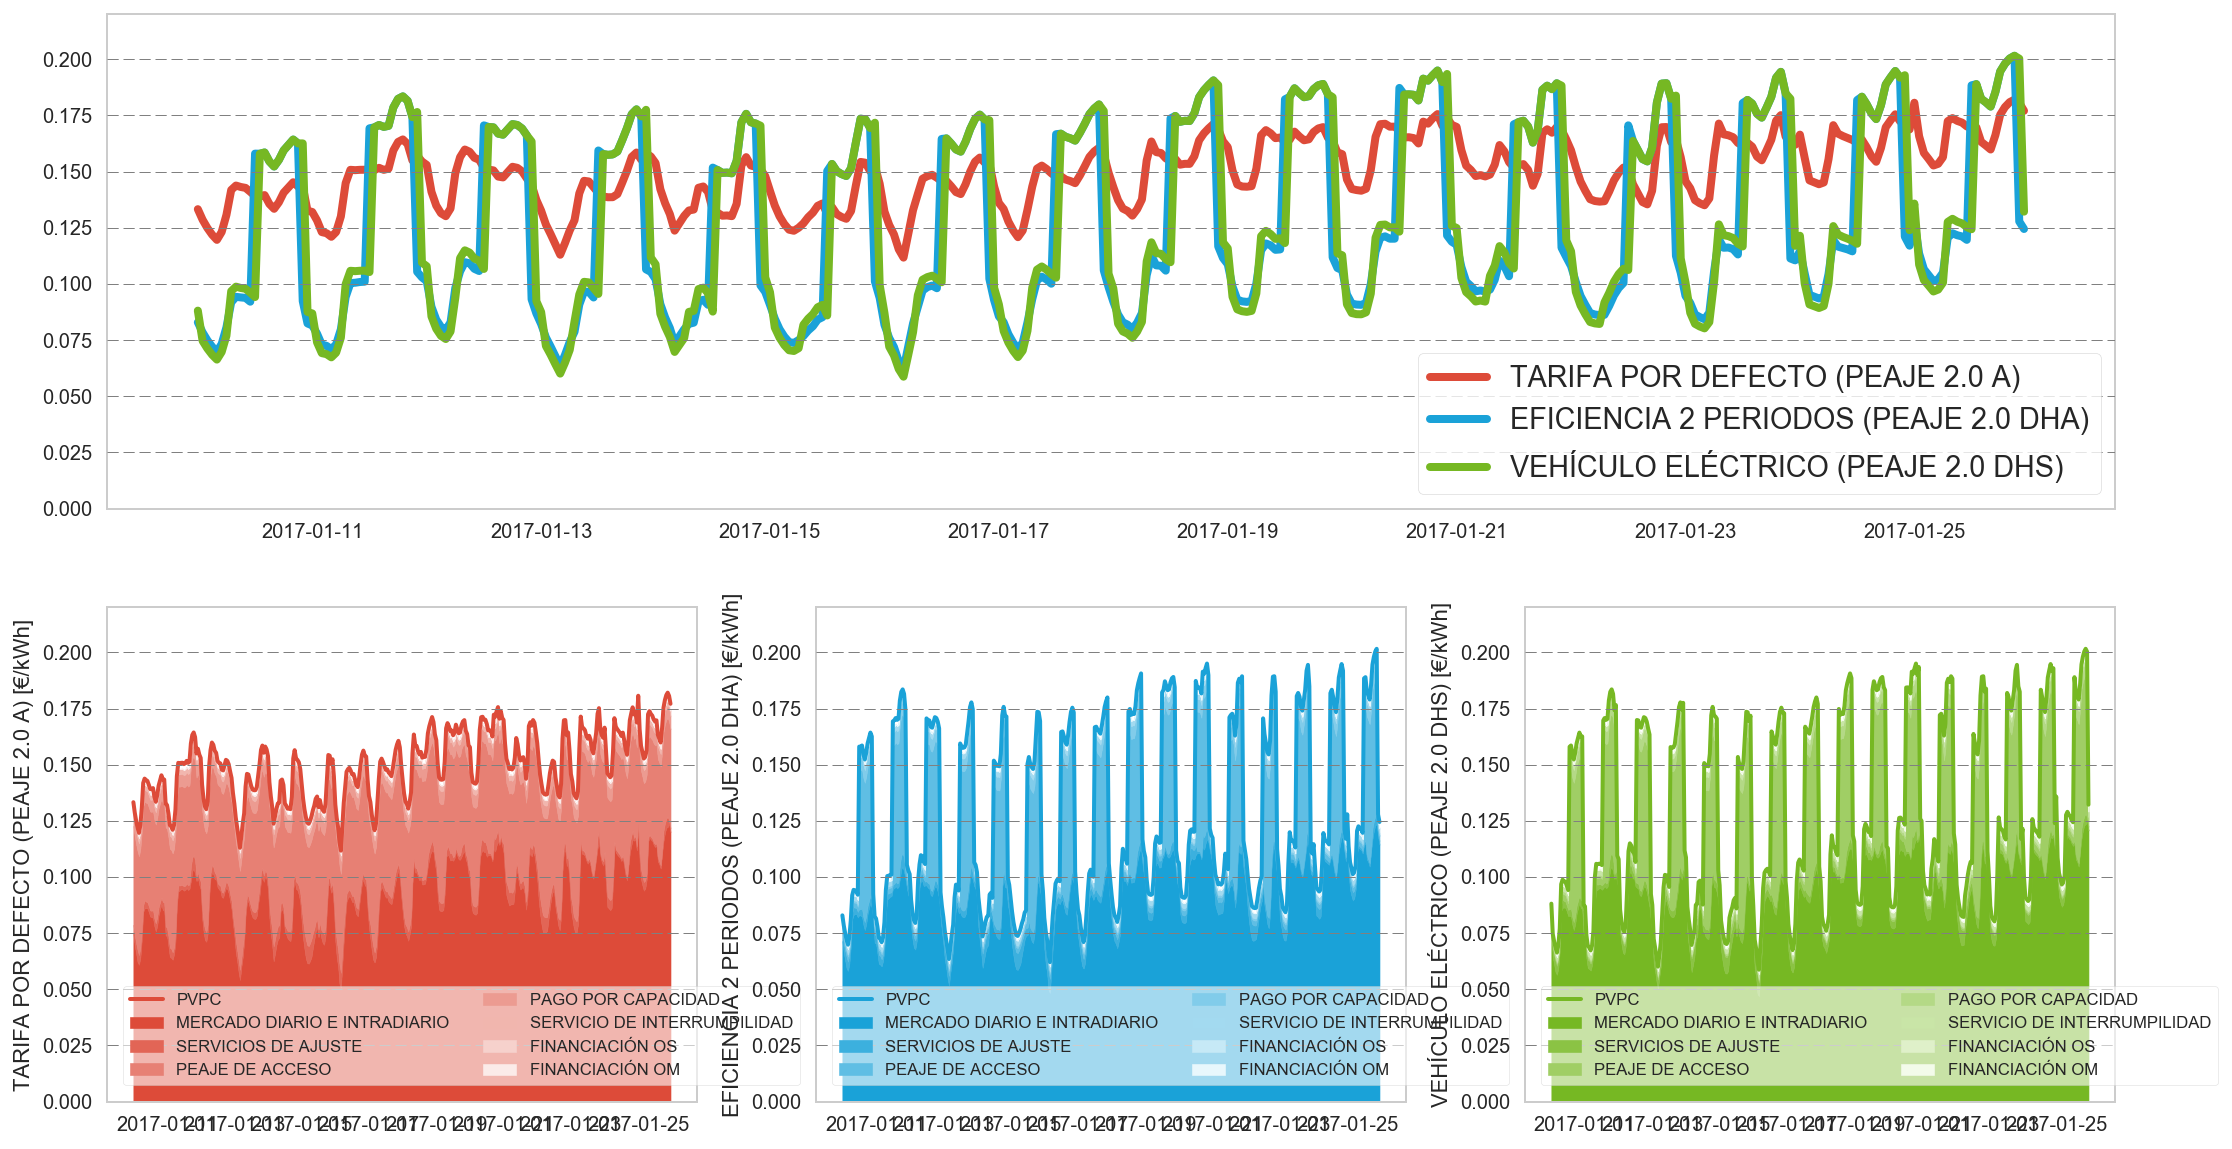

In [52]:
pvpcplot_grid_hora(df_pvpc.loc['2017-01-10':'2017-01-25'])

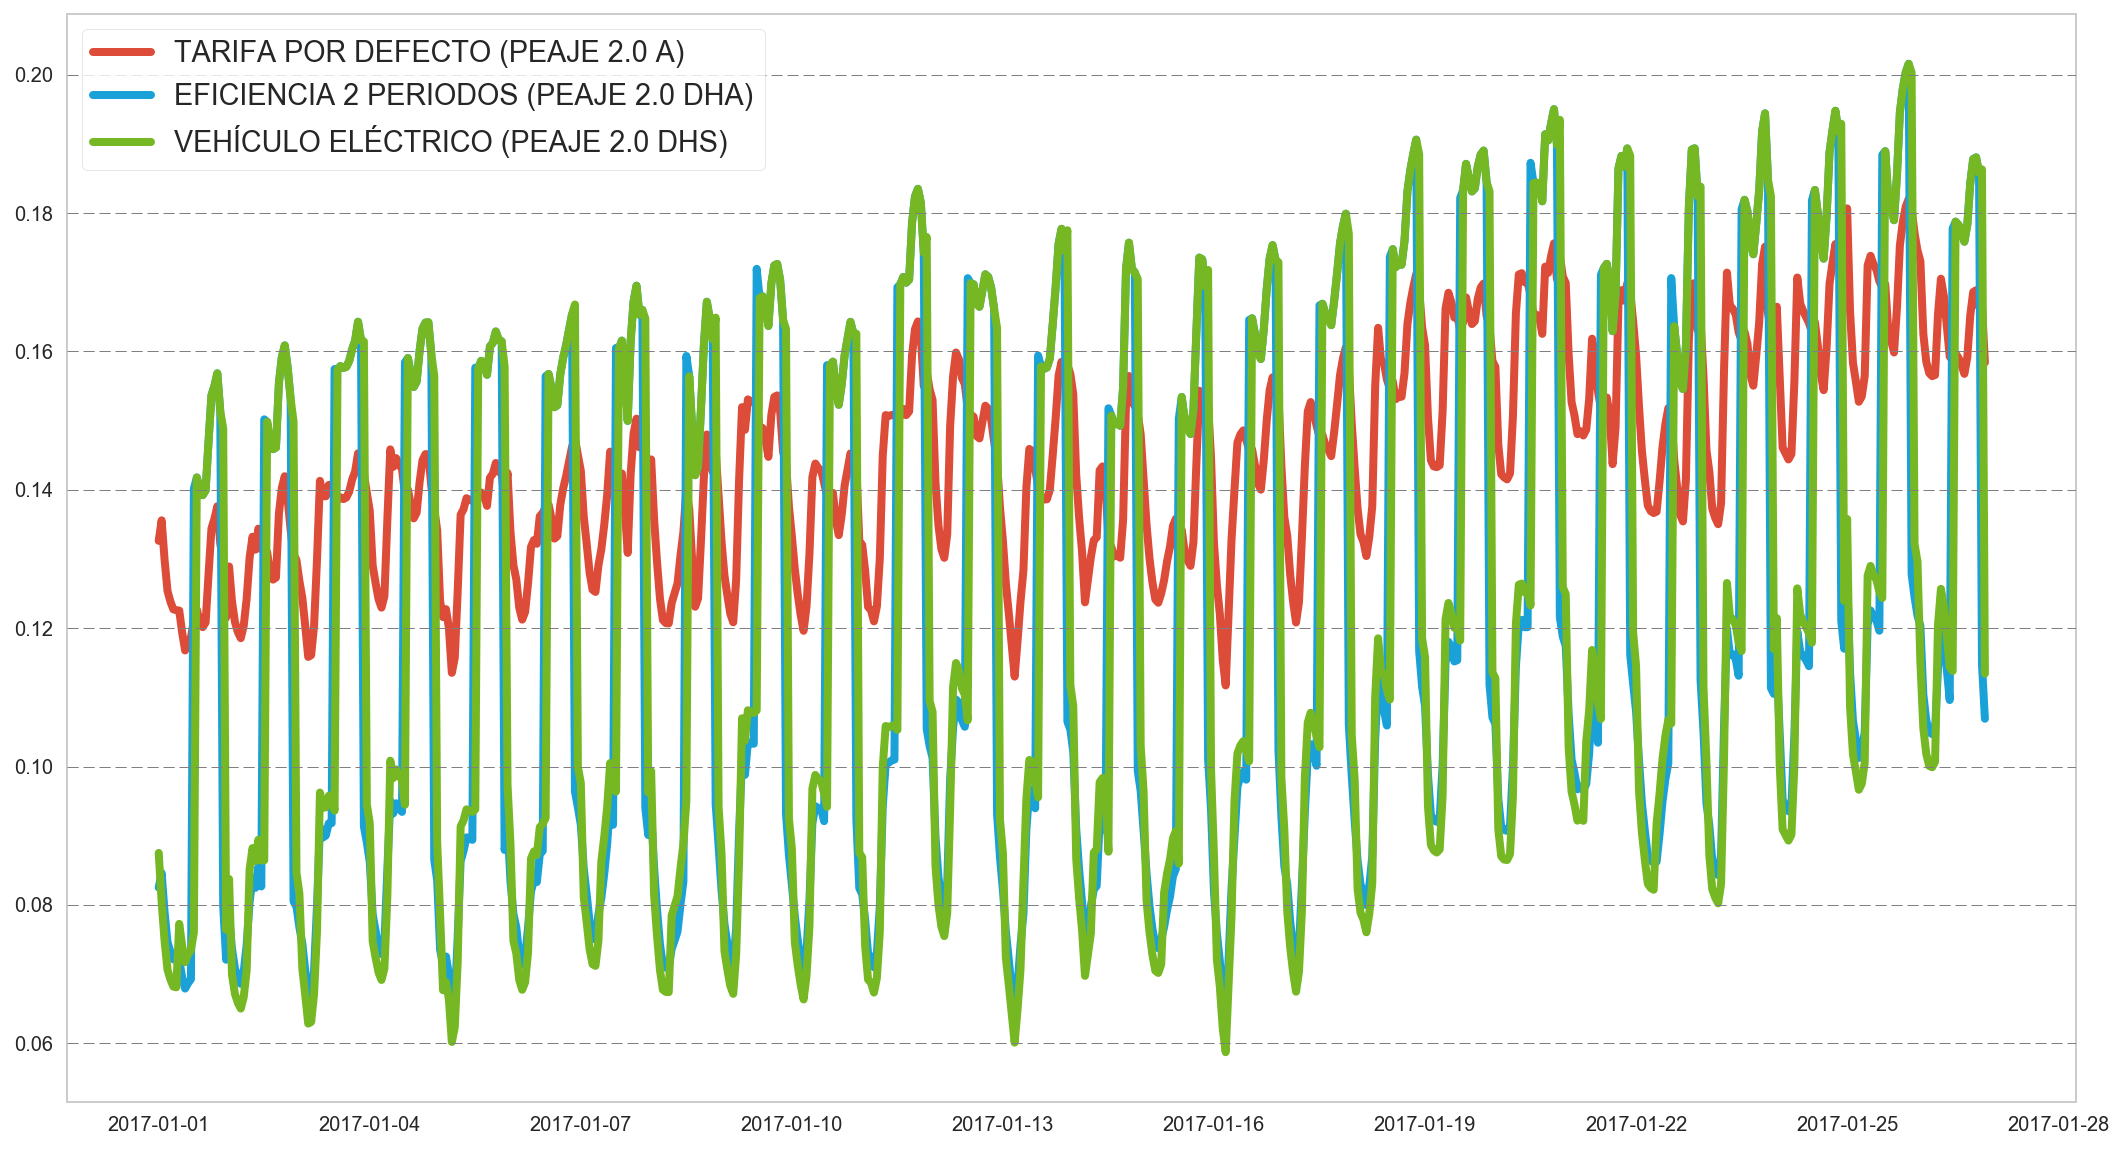

In [54]:
pvpcplot_tarifas_hora(df_pvpc.loc['2017-01-01':'2017-01-26'], plot_perdidas=False)